<a href="https://colab.research.google.com/github/vunnampragathi/projects/blob/main/Predictive_customer_churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing The required libraries

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
dataset = pd.read_csv('/content/Churn_Modelling.csv')

# Data Preprocessing

In [126]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [127]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [128]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [129]:
#removing unwanted columns
dataset= dataset.drop(columns = ['RowNumber','CustomerId','Surname'])

In [130]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [132]:
# analysing the data based on geography
dataset.groupby('Geography').mean(numeric_only=True)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,
France,649.668329,38.511767,5.004587,62092.636516,1.530913,0.706621,0.516753,99899.180814,0.161548
Germany,651.453567,39.771622,5.009964,119730.116134,1.519729,0.713830,0.497409,101113.435102,0.324432
Spain,651.333872,38.890997,5.032297,61818.147763,1.539362,0.694792,0.529673,99440.572281,0.166734


In [133]:
# analysing the data based on gender
dataset.groupby('Gender').mean(numeric_only=True)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,
Female,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


In [135]:
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


<Axes: ylabel='Frequency'>

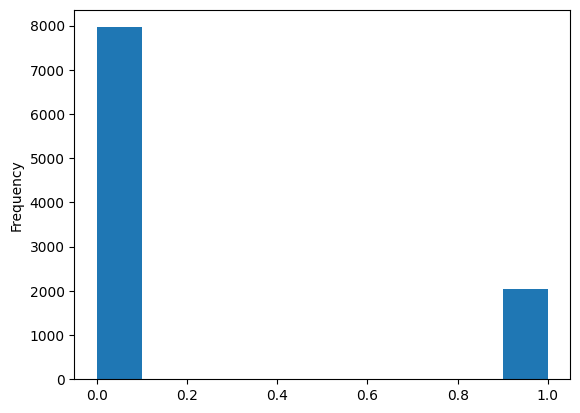

In [136]:
dataset.Exited.plot.hist()

In [143]:
(dataset.Exited==1).sum()

2037

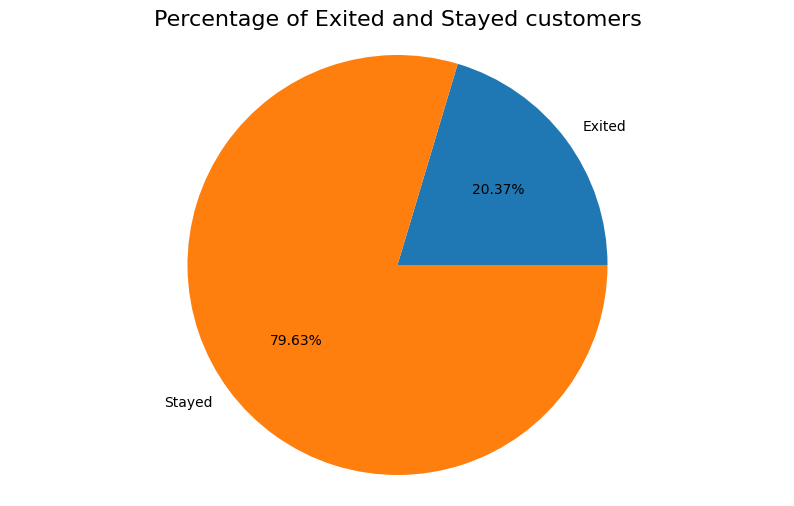

In [137]:
# Checking the percentage of exited and stayed customers to the total amount

labels = 'Exited', 'Stayed'
sizes = [dataset.Exited[dataset['Exited']==1].count(), dataset.Exited[dataset['Exited']==0].count()]
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.pie(sizes, labels=labels, autopct='%1.2f%%',
        shadow=False, startangle=0)
ax1.axis('equal')
plt.title("Percentage of Exited and Stayed customers", size = 16)
plt.show()

<Axes: xlabel='IsActiveMember', ylabel='count'>

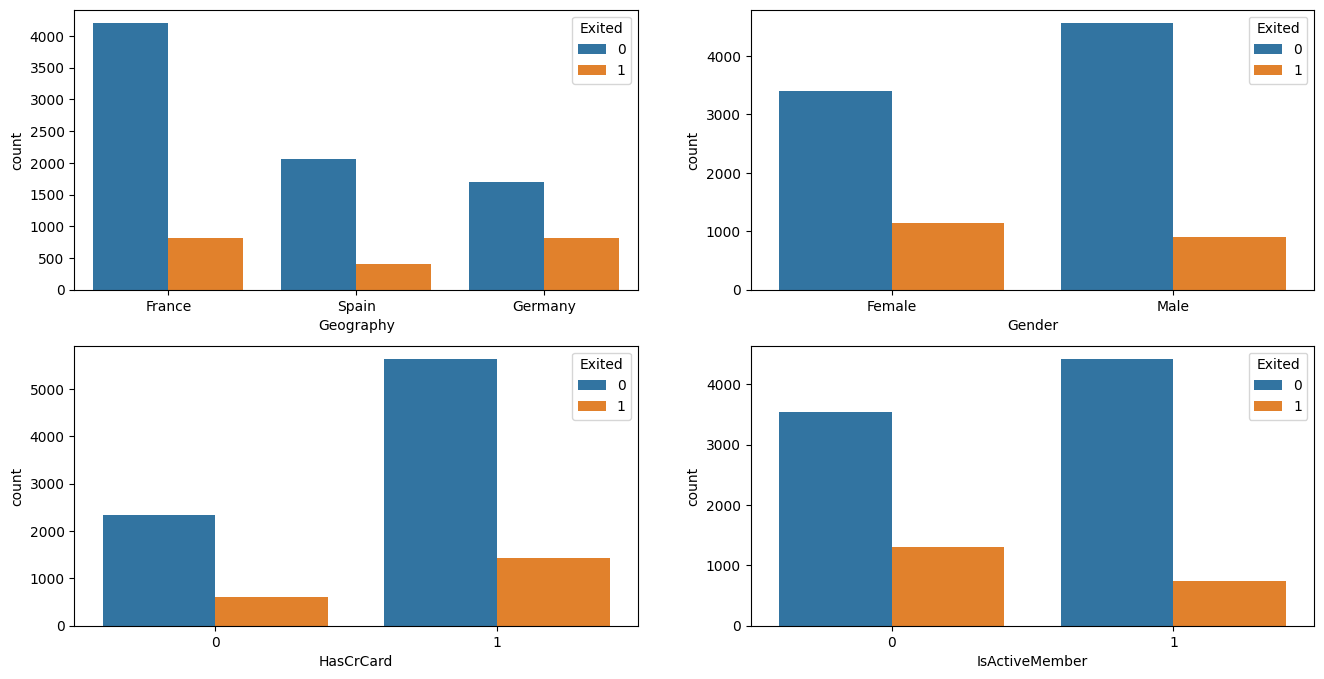

In [138]:
# Checking the relation of target variable with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(16, 8))

sns.countplot(x='Geography', hue = 'Exited',data = dataset, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = dataset, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = dataset, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = dataset, ax=axarr[1][1])

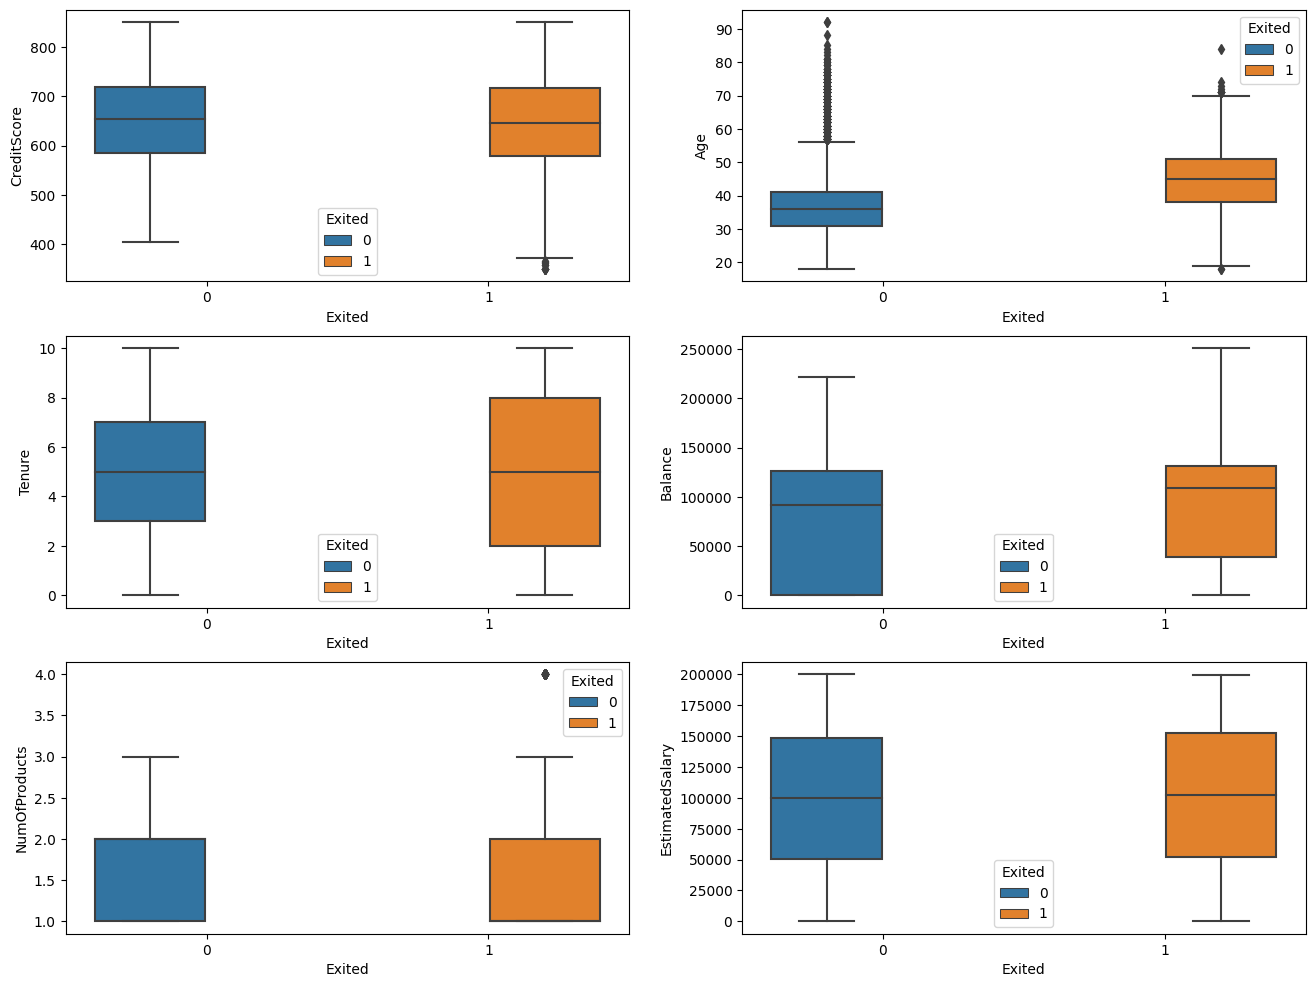

In [139]:
# Checking the relation of target variable with the numerical data

fig, axarr = plt.subplots(3, 2, figsize=(16, 12))
sns.boxplot(y='CreditScore', x='Exited', hue='Exited', data=dataset, ax=axarr[0][0])
sns.boxplot(y='Age', x='Exited', hue='Exited', data=dataset, ax=axarr[0][1])
sns.boxplot(y='Tenure', x='Exited', hue='Exited', data=dataset, ax=axarr[1][0])
sns.boxplot(y='Balance', x='Exited', hue='Exited', data=dataset, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts', x='Exited', hue='Exited', data=dataset, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary', x='Exited', hue='Exited', data=dataset, ax=axarr[2][1])

plt.subplots_adjust(hspace=0.2)

In [140]:
dataset= pd.get_dummies(data=dataset,drop_first=True)

In [141]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [144]:
dataset_2=dataset.drop(columns='Exited')

<Axes: title={'center': 'Correlated with Exited Column'}>

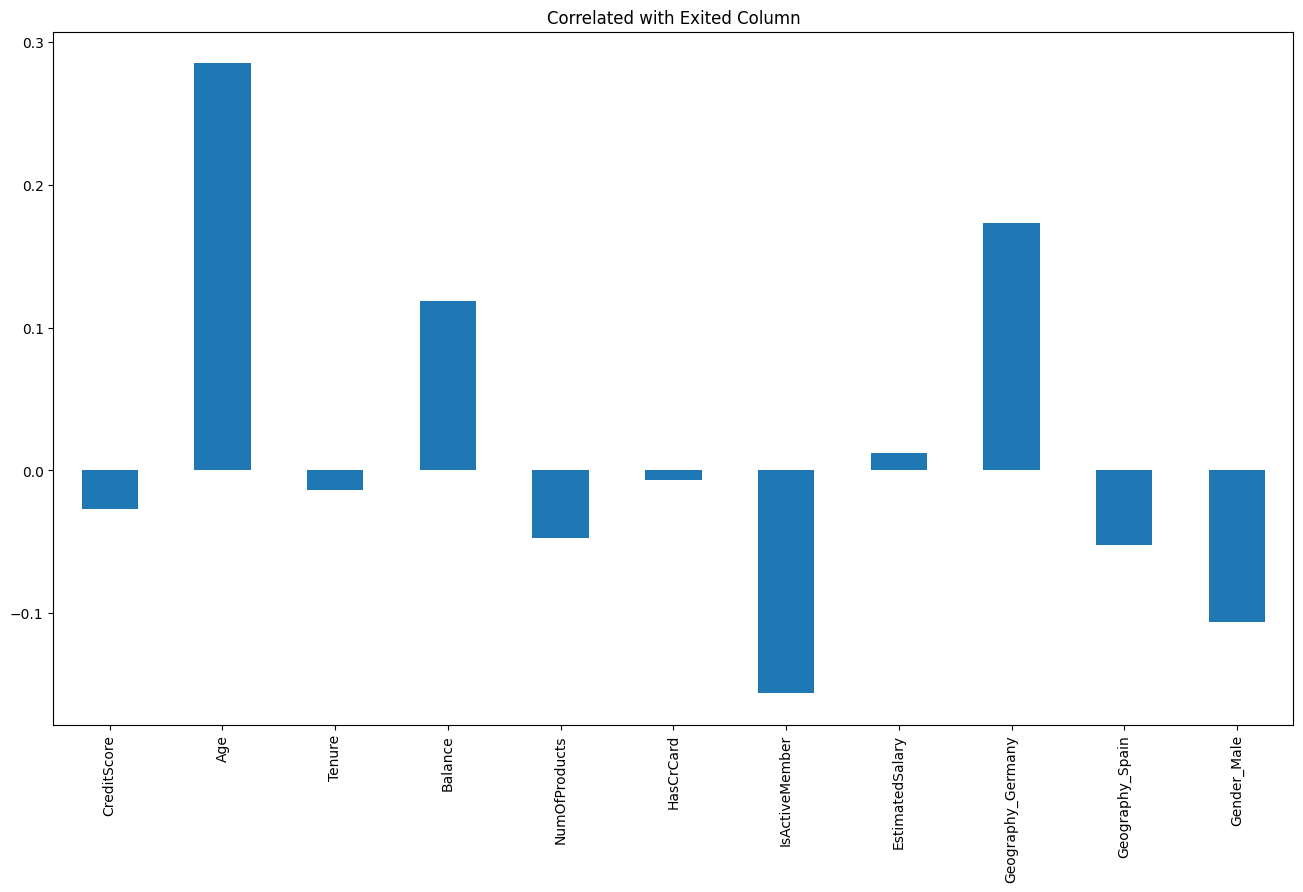

In [145]:
dataset_2.corrwith(dataset['Exited']).plot.bar(figsize=(16,9), title='Correlated with Exited Column', rot = 90,grid = False)

In [146]:
corr=dataset.corr()

<Axes: >

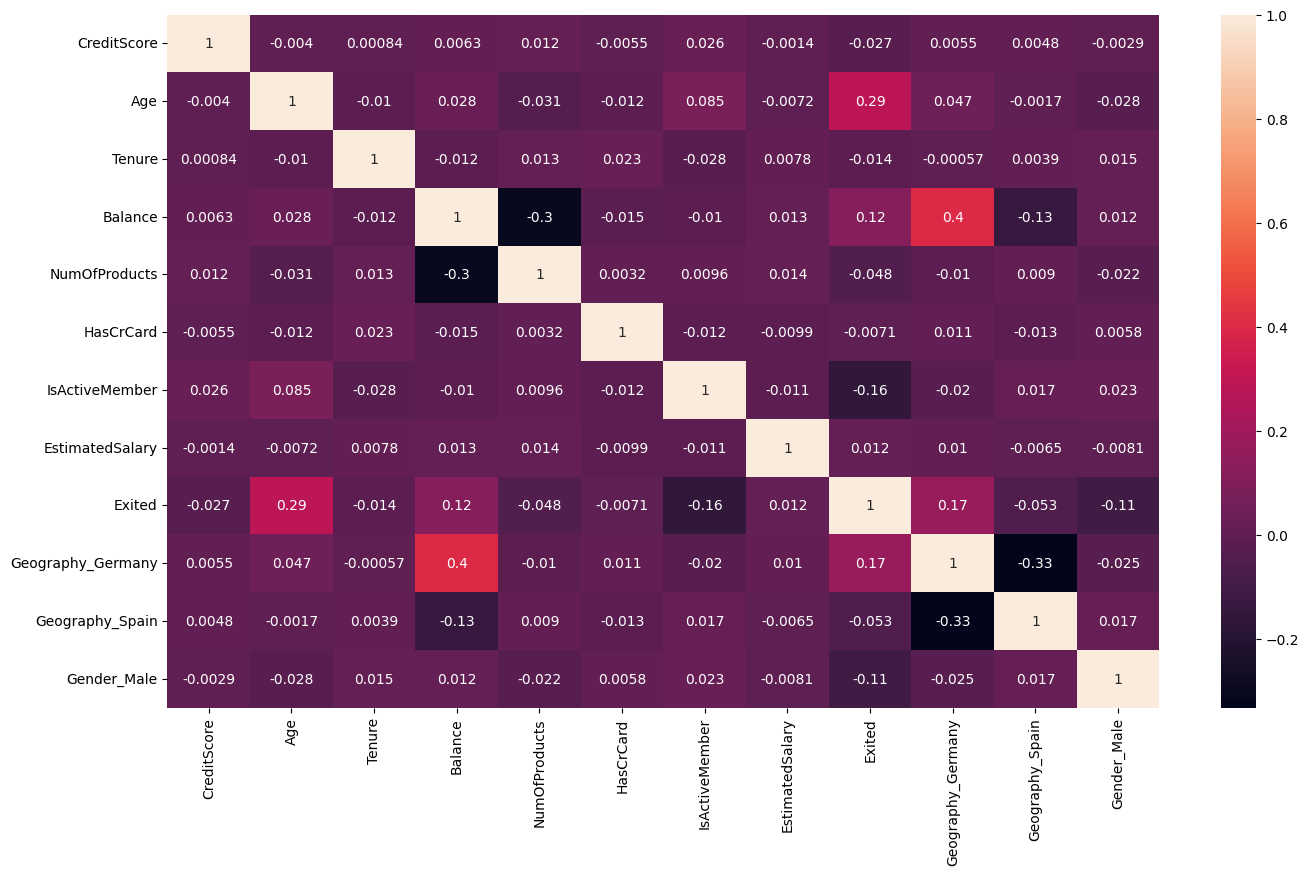

In [147]:
plt.figure(figsize=(16,9))
sns.heatmap(corr,annot=True)


In [148]:
X= dataset.drop(columns='Exited')
y= dataset['Exited']

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [150]:
X_test.shape

(2000, 11)

 StandardScaler is a commonly used technique in machine learning for standardizing or scaling numerical features before fitting a model. It transforms the data by subtracting the mean and dividing by the standard deviation, resulting in a distribution with a mean of 0 and a standard deviation of 1.

In [151]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [152]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

# Applying the models


 Logistic regression is used for predicting the categorical dependent variable using a given set of independent variables.

In [153]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [154]:
y_pred= clf.predict(X_test)

In [155]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [156]:
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)

In [157]:
results=pd.DataFrame([['Logistic regression',acc,f1,prec,rec]],columns=['Model','Accuracy','F1','Precision','Recall'])
results

,Model,Accuracy,F1,Precision,Recall
0,Logistic regression,0.811,0.336842,0.581818,0.237037


In [158]:
print(confusion_matrix(y_test,y_pred))

[[1526   69]
 [ 309   96]]


 Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and it takes the average to improve the predictive accuracy of that dataset.

In [159]:
from sklearn.ensemble import RandomForestClassifier


In [160]:
clf_rf = RandomForestClassifier(random_state=0).fit(X_train, y_train)


In [161]:
y_pred= clf_rf.predict(X_test)
acc=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
RF_results=pd.DataFrame([['Random Forest Classifier',acc,f1,prec,rec]],columns=['Model','Accuracy','F1','Precision','Recall'])
results.append(RF_results,ignore_index=True)

<ipython-input-161-fdad8c513d5d>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append(RF_results,ignore_index=True)


,Model,Accuracy,F1,Precision,Recall
0,Logistic regression,0.811,0.336842,0.581818,0.237037
1,Random Forest Classifier,0.867,0.613372,0.745583,0.520988


In [162]:
print(confusion_matrix(y_test,y_pred))

[[1523   72]
 [ 194  211]]


# Prediction

In [163]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [164]:
single_obs_1=[[608, 41, 1, 83807.86, 1, 0, 1, 112542.58, 0, 1, 0]]

In [165]:
clf.predict(scaler.fit_transform(single_obs_1))

array([0])

In [166]:
single_obs_2=[[502, 42, 8, 159660.80, 3, 1, 0, 113931.57, 0, 0, 0]]

In [167]:
clf_rf.predict(scaler.fit_transform(single_obs_2))

array([0])